In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#classification
from sklearn.neighbors import KNeighborsClassifier #k-plus proches voisins
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd

#Partitionnement
from sklearn.cluster import AgglomerativeClustering #Regroupement hiérarchique (Partitionnement binaire)
from pyclustering.cluster.kmedoids import kmedoids

#réduction de dimensionnalité
from sklearn.decomposition import KernelPCA #ce n'est pas PCoA mais on peut l'utiliser pour que le résultat soit le même
from sklearn.manifold import Isomap

Pour commencer le projet, nous allons créer une baseline pour MNIST en faisant la distance euclidienne pour tous les algorithmes que le projet nous indique. Donc nous le ferons pour:
● k-medoïde
● Partition binaire (Regroupement hiérarchique)
● PCoA (c'est un cas particulier de MDS)
● Isomap
● KNN (k-plus proches voisins)

Nous allons aussi importer MNIST et ADULT

In [26]:
from sklearn.preprocessing import StandardScaler, normalize
# https://notebook.community/francesco-mannella/neunet-basics/course/mnist
# import the mnist class
from mnist import MNIST

# init with the 'data' dir
mndata = MNIST('.\data')

# Load data
(train_X, train_y) = mndata.load_training()
data_train = pd.DataFrame(train_X)
#train_X = np.asarray(train_X)
#train_y = np.asarray(train_y)
(test_X, test_y) = mndata.load_testing()
data_test = pd.DataFrame(test_X)
#test_X = np.asarray(test_X)
#test_y = np.asarray(test_y)

print('X_train: ' + str(np.shape(train_X)))
print('Y_train: ' + str(np.shape(train_y)))
print('X_test:  '  + str(np.shape(test_X)))
print('Y_test:  '  + str(np.shape(test_y)))

# Standardizing the data (preprocessing)
scaler = StandardScaler()
X_std_train = scaler.fit_transform(train_X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized_train = normalize(X_std_train)

# Converting the numpy array into a pandas DataFrame
X_normalized_train = pd.DataFrame(X_normalized_train)


X_std_test = scaler.fit_transform(test_X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized_test = normalize(X_std_test)

# Converting the numpy array into a pandas DataFrame
X_normalized_test = pd.DataFrame(X_normalized_test)

# The number of pixels per side of all images
img_side = 28

# Each input is a raw vector.
# The number of units of the network
# corresponds to the number of input elements
n_mnist_pixels = img_side*img_side

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


Ici on vérifie que le dataset à bien téléchargé.

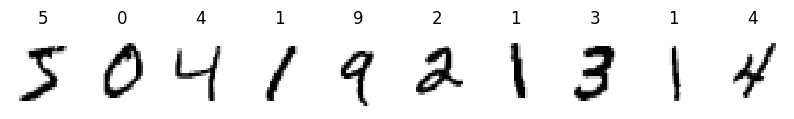

In [27]:
%matplotlib inline
from pylab import *

# Define the number of samples to take
num_samples = 10

# create a figure where we will store all samples
figure(figsize=(10,1))

# Iterate over samples indices
for sample in range(num_samples) :

    # The image corresponding to the 'sample' index
    img = train_X[sample]

    # The label of the image
    label = train_y[sample]

    # The image is stored as a rolled vector,
    # we have to roll it back in a matrix
    aimg = array(img).reshape(img_side, img_side)

    # Open a subplot for each sample
    subplot(1, num_samples, sample+1)

    # The corresponding digit is the title of the plot
    title(label)

    # We use imshow to plot the matrix of pixels
    imshow(aimg, interpolation = 'none',
        aspect = 'auto', cmap = cm.binary)
    axis("off")

show()

Ici nous ferons l'algorithme de k-medoïde avec la distance euclidienne pour MNIST

In [ ]:
# # https://medium.com/@ali.soleymani.co/beyond-scikit-learn-is-it-time-to-retire-k-means-and-use-this-method-instead-b8eb9ca9079a
# kmedo = KMedoids(n_clusters = 9, random_state=1)
# kmedo.fit(mndata.train_images, mndata.train_labels)
# # Doing predictions on the test set
# y_hat = kmedo.predict(mndata.test_images)
# acc = accuracy_score(mndata.test_labels, y_hat)
# print(acc)

In [ ]:
from pyclustering.utils import distance_metric, type_metric
from pyclustering.cluster import cluster_visualizer

initial_medoids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# create Minkowski distance metric with degree equals to '2'
metric = distance_metric(type_metric.MINKOWSKI, degree=2)
# create K-Medoids algorithm with specific distance metric
medo = kmedoids(train_X[0:1], initial_medoids, metric=metric)

# https://pyclustering.github.io/docs/0.9.0/html/d0/dd3/classpyclustering_1_1cluster_1_1kmedoids_1_1kmedoids.html

# Run cluster analysis and obtain results.
medo.process()
clusters_medo = medo.get_clusters()
# Show allocated clusters.
print(clusters_medo)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters_medo, sample)
visualizer.show()

Ici nous ferons la partition binaire avec la distance euclidienne pour MNIST

In [42]:
# Prédictions en faisant la moyenne
def agglomerative_clustering_predict(agglomerative_clustering, X):
    average = list()
    ith_clusters = list()
    for i in range(agglomerative_clustering.n_clusters):
        # On fouille dans les train_X pour tous les labels i
        for j in range(len(agglomerative_clustering.labels_)):
            if agglomerative_clustering.labels_[j]==i:
                ith_clusters.append(X.iloc[j])
        average.append(np.array(ith_clusters).mean(axis=1))
    # np.stack makes this error: all input arrays must have the same shape
    return np.argmin(np.stack(average), axis=0)

In [ ]:
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# https://www.projectpro.io/recipes/do-agglomerative-clustering-in-python
# https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

pca = PCA(n_components = 2)
# Training data set
X_principal = pca.fit_transform(X_normalized_train)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Testing data set
X_secondary = pca.fit_transform(X_normalized_test)
X_secondary = pd.DataFrame(X_secondary)
X_secondary.columns = ['P1', 'P2']


plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

ac2 = AgglomerativeClustering(n_clusters = 10, affinity='euclidean')
ac2.fit(X_principal)
predictions = agglomerative_clustering_predict(ac2, X_principal)
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.title("10 clusters")
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = predictions, cmap ='rainbow')
plt.show()

ac2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean')

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.title("2 clusters")
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = predictions, cmap ='rainbow')
plt.show()


# # Creating the agglomerative model
# agglo = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='average')
# # Fitting the model with the standardized data
# model = agglo.fit(X_std_train)
# # Predictions
# clusters = pd.DataFrame(model.fit_predict(X_std_test))
# clusters_agglo = model.fit_predict(X_std_test)
# acc = accuracy_score(y_true=test_y, y_pred=clusters_agglo)
#
# print(f"Accuracy for agglomerative clustering: {acc}")
# # data["Cluster"] = clusters

ValueError: all input arrays must have the same shape

Ici nous ferons le PCoA avec la distance euclidienne pour MNIST

In [ ]:
pcoa = KernelPCA(n_components=1, kernel='precomputed')
pcoa_circle = pcoa.fit_transform(-.5*train_X**2) #-.5*D**2 est crucial!!!
pcoa_infinity = pcoa.transform(-.5*infinity_circle_cosine_dissimilarity**2) #-.5*D**2 est crucial!!!

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)
ax.set_title('Cosine PCoA sur circle')
ax.scatter(pcoa_circle, np.zeros_like(pcoa_circle), c=theta);

ax = fig.add_subplot(212)
ax.set_title('Cosine PCoA sur infinity')
ax.scatter(pcoa_infinity, np.zeros_like(pcoa_infinity), c=theta2);

Ici nous ferons le KNN avec la distance euclidienne pour MNIST

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, algorithm='auto')
knn.fit(train_X, train_y)

predictions = knn.predict(test_X)

acc = accuracy_score(y_true=test_y, y_pred=predictions)
print(f"Accuracy for KNN algorithm: {acc}")
# fig = plt.figure(figsize=(12, 6))
# circle_ax = fig.add_subplot(121)
# infinity_ax = fig.add_subplot(122)
# circle_ax.set_title('Cosine 2-plus proches voisins sur circle')
# infinity_ax.set_title('Cosine 2-plus proches voisins sur infinity')
#
# for i in range(4):
#     circle_cluster = circle[np.where(knn_circle == i)[0]]
#     circle_ax.scatter(circle_cluster[:, 0], circle_cluster[:, 1])
#
#     infinity_cluster = infinity[np.where(knn_infinity == i)[0]]
#     infinity_ax.scatter(infinity_cluster[:, 0], infinity_cluster[:, 1])

Accuracy for KNN algorithm: 0.9688
